In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_yt = pd.read_csv('C:/Users/james/Downloads/USYT.csv')

In [3]:
df_yt.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
df_yt.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


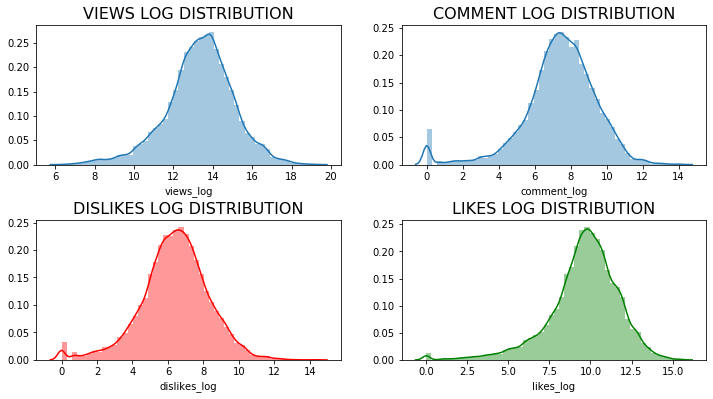

In [6]:
df_yt['likes_log'] = np.log(df_yt['likes']+1)
df_yt['views_log'] = np.log(df_yt['views']+1)
df_yt['dislikes_log'] = np.log(df_yt['dislikes']+1)
df_yt['comment_log'] = np.log(df_yt['comment_count']+1)

plt.figure(figsize=(12,6))

plt.subplot(221)
g1 = sns.distplot(df_yt['views_log'])
g1.set_title('VIEWS LOG DISTRIBUTION', fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yt['likes_log'], color='green')
g2.set_title('LIKES LOG DISTRIBUTION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yt['dislikes_log'],color='r')
g3.set_title('DISLIKES LOG DISTRIBUTION', fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yt['comment_log'])
g4.set_title('COMMENT LOG DISTRIBUTION', fontsize = 16)

plt.subplots_adjust(wspace=0.2, hspace=0.4, top = 0.9)
plt.show()

In [7]:
print('views quantiles')
print(df_yt['views'].quantile([.01,.25,.5,.75,.99]))
print('')

print('Likes quantiles')
print(df_yt['likes'].quantile([.01,.25,.5,.75,.99]))
print('')

print('Dislikes quantiles')
print(df_yt['dislikes'].quantile([.01,.25,.5,.75,.99]))
print('')

print('comment quantiles')
print(df_yt['comment_count'].quantile([.01,.25,.5,.75,.99]))
print('')

views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64



In [8]:
df_yt['category_name'] = np.nan

df_yt.loc[(df_yt['category_id']==1),'category_name'] = 'Film And Animation'
df_yt.loc[(df_yt['category_id']==2),'category_name'] = 'Cars And Vehicles'
df_yt.loc[(df_yt['category_id']==10),'category_name'] ='Music'
df_yt.loc[(df_yt['category_id']==15),'category_name'] ='Pets And Animals'
df_yt.loc[(df_yt['category_id']==17),'category_name'] ='Sports'
df_yt.loc[(df_yt['category_id']==19),'category_name'] ='Travel And Events'
df_yt.loc[(df_yt['category_id']==20),'category_name']= 'Gaming'
df_yt.loc[(df_yt['category_id']==22),'category_name'] ='People And Blogs'
df_yt.loc[(df_yt['category_id']==23),'category_name'] ='Comedy'
df_yt.loc[(df_yt['category_id']==24),'category_name'] ='Entertainment'
df_yt.loc[(df_yt['category_id']==25),'category_name']='News And Politics'
df_yt.loc[(df_yt['category_id']==26),'category_name']='How to and Style'
df_yt.loc[(df_yt['category_id']==27),'category_name']='Education'
df_yt.loc[(df_yt['category_id']==28),'category_name']='Science And Technology'
df_yt.loc[(df_yt['category_id']==25),'category_name']='News And Politics'

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People And Blogs    3210
Name: category_name, dtype: int64


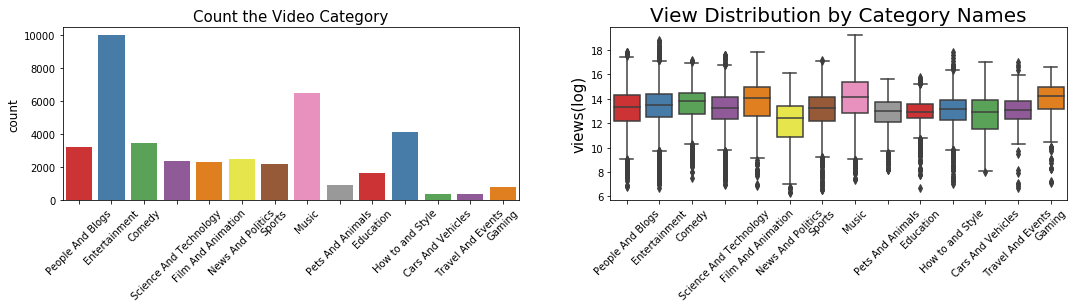

In [9]:
print('Category Name count')
print(df_yt.category_name.value_counts()[:5])

plt.figure(figsize=(18,9))

plt.subplot(221)
g= sns.countplot('category_name', data=df_yt, palette = 'Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Count the Video Category', fontsize=15)
g.set_xlabel('', fontsize=12)
g.set_ylabel('count', fontsize=12)

plt.subplot(222)
g1 = sns.boxplot(x='category_name', y='views_log',data=df_yt, palette='Set1')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
g1.set_title('View Distribution by Category Names', fontsize=20)
g1.set_xlabel('', fontsize=15)
g1.set_ylabel('views(log)', fontsize=15)

plt.subplots_adjust(hspace=0.9, top=0.9)
plt.show()



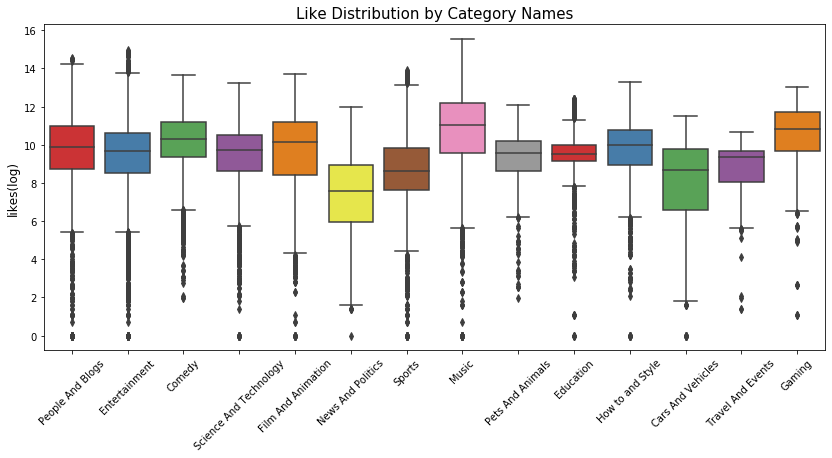

In [10]:
plt.figure(figsize=(14,6))

g =sns.boxplot(x='category_name',y='likes_log', data=df_yt, palette ='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Like Distribution by Category Names', fontsize=15)
g.set_xlabel('', fontsize=12)
g.set_ylabel('likes(log)', fontsize=12)
plt.show()


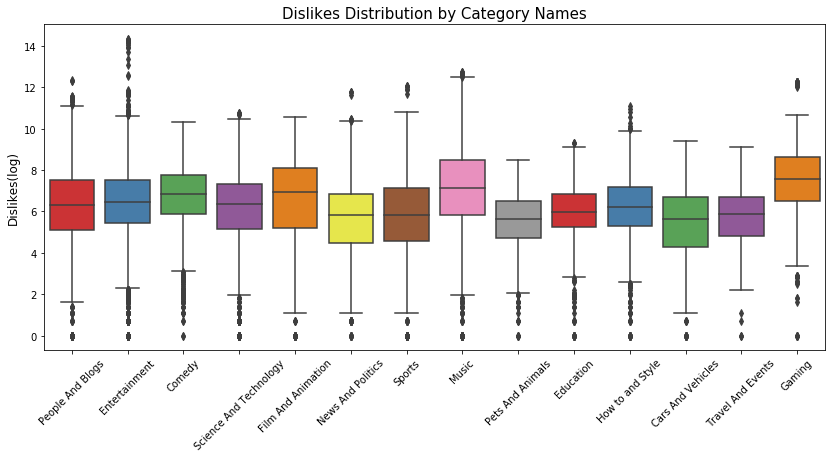

In [11]:
plt.figure(figsize=(14,6))

g=sns.boxplot(x='category_name', y='dislikes_log', data=df_yt,palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Dislikes Distribution by Category Names', fontsize=15)
g.set_xlabel('', fontsize=12)
g.set_ylabel('Dislikes(log)', fontsize=12)
plt.show()

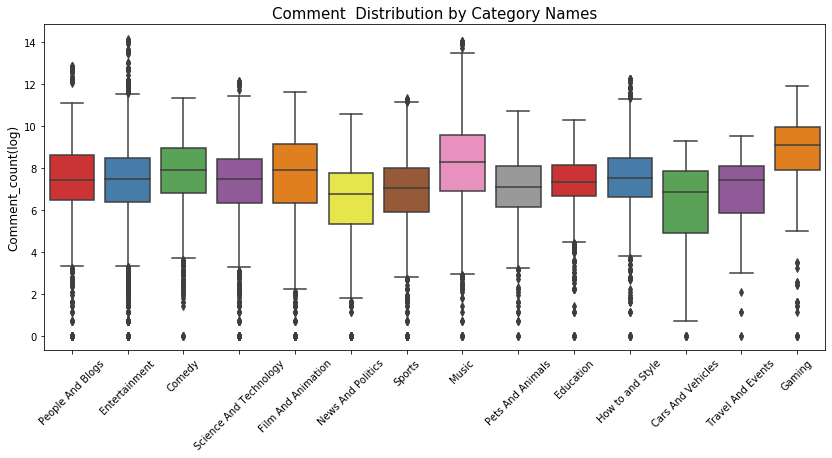

In [12]:
plt.figure(figsize=(14,6))

g=sns.boxplot(x='category_name', y='comment_log', data=df_yt,palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Comment  Distribution by Category Names', fontsize=15)
g.set_xlabel('', fontsize=12)
g.set_ylabel('Comment_count(log)', fontsize=12)
plt.show()

In [13]:
df_yt['like_rate'] = df_yt['likes']/df_yt['views']*100
df_yt['dislike_rate'] = df_yt['dislikes']/df_yt['views']*100
df_yt['comment_rate'] = df_yt['comment_count']/df_yt['views']*100

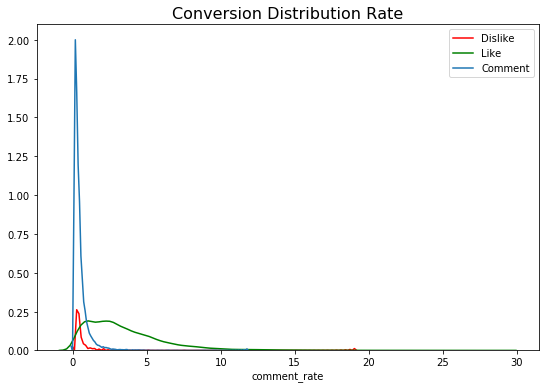

In [14]:
plt.figure(figsize=(9,6))

g1=sns.distplot(df_yt['dislike_rate'],color='red', hist=False, label='Dislike')
g1=sns.distplot(df_yt['like_rate'], color='green',hist=False,label='Like')
g1=sns.distplot(df_yt['comment_rate'],hist=False,label='Comment')
g1.set_title('Conversion Distribution Rate', fontsize=16)

plt.legend()
plt.show()

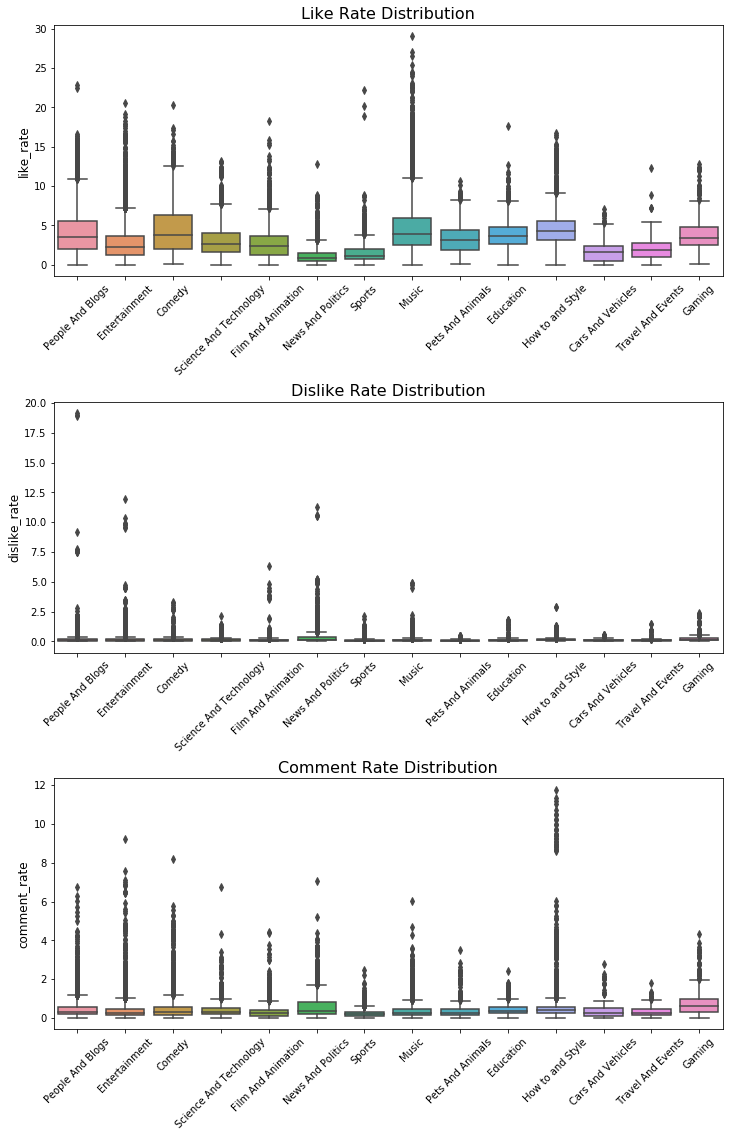

In [15]:
plt.figure(figsize=(12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name', y='like_rate', data=df_yt)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Like Rate Distribution', fontsize=16)
g.set_xlabel('',fontsize=12)
g.set_ylabel('like_rate', fontsize=12)

plt.subplot(312)
g1= sns.boxplot(x='category_name', y='dislike_rate', data=df_yt)
g1.set_xticklabels(g.get_xticklabels(), rotation=45)
g1.set_title('Dislike Rate Distribution', fontsize=16)
g1.set_xlabel('',fontsize=12)
g1.set_ylabel('dislike_rate', fontsize=12)

plt.subplot(313)
g2= sns.boxplot(x='category_name', y='comment_rate', data=df_yt)
g2.set_xticklabels(g.get_xticklabels(), rotation=45)
g2.set_title('Comment Rate Distribution', fontsize=16)
g2.set_xlabel('',fontsize=12)
g2.set_ylabel('comment_rate', fontsize=12)

plt.subplots_adjust(wspace=0.2,hspace=0.5,top=0.9)
plt.show()


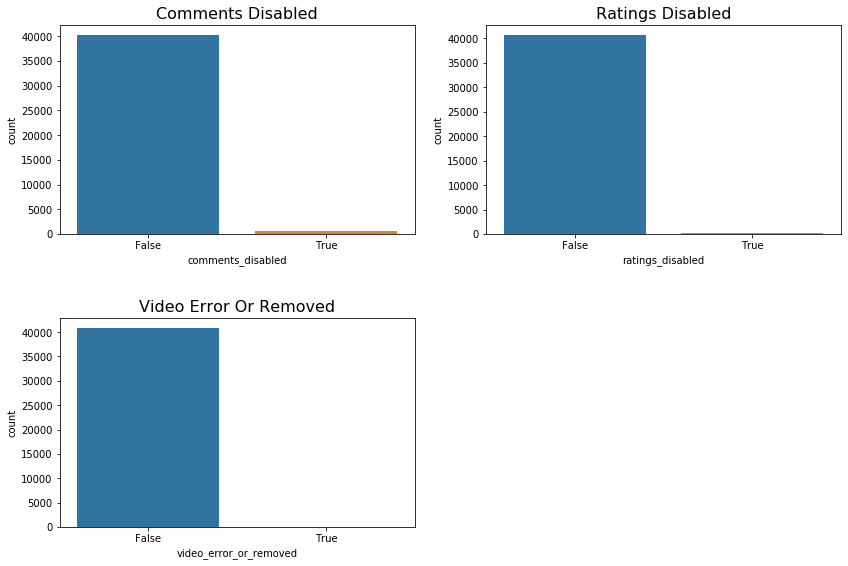

In [16]:
plt.figure(figsize=(14,9))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)

plt.subplot(2,2,1)
g=sns.countplot(x='comments_disabled',data=df_yt)
g.set_title('Comments Disabled', fontsize=16)

plt.subplot(2,2,2)
g1=sns.countplot(x='ratings_disabled', data=df_yt)
g1.set_title('Ratings Disabled', fontsize=16)

plt.subplot(2,2,3)
g2=sns.countplot(x='video_error_or_removed', data=df_yt)
g2.set_title('Video Error Or Removed', fontsize=16)

plt.show()


q:\Users\james\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
q:\Users\james\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


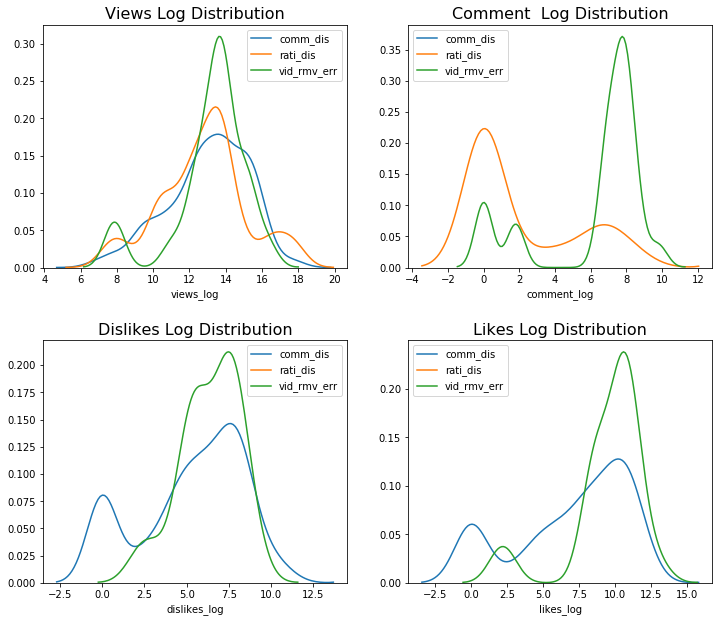

In [17]:
plt.figure(figsize=(12,10))

plt.subplot(221)
g1= sns.distplot(df_yt[df_yt['comments_disabled']==True]['views_log'],hist=False, label='comm_dis')
g1= sns.distplot(df_yt[df_yt['ratings_disabled']==True]['views_log'],hist=False,label='rati_dis')
g1= sns.distplot(df_yt[df_yt['video_error_or_removed']==True]['views_log'],hist=False,label='vid_rmv_err')
g1.set_title('Views Log Distribution', fontsize=16)

plt.subplot(222)
g2=sns.distplot(df_yt[df_yt['comments_disabled']==True]['comment_log'],hist=False,label='comm_dis')
g2= sns.distplot(df_yt[df_yt['ratings_disabled']==True]['comment_log'],hist=False,label='rati_dis')
g2= sns.distplot(df_yt[df_yt['video_error_or_removed']==True]['comment_log'],hist=False,label='vid_rmv_err')
g2.set_title('Comment  Log Distribution', fontsize=16)

plt.subplot(223)
g3=sns.distplot(df_yt[df_yt['comments_disabled']==True]['dislikes_log'],hist=False,label='comm_dis')
g3= sns.distplot(df_yt[df_yt['ratings_disabled']==True]['dislikes_log'],hist=False,label='rati_dis')
g3= sns.distplot(df_yt[df_yt['video_error_or_removed']==True]['dislikes_log'],hist=False,label='vid_rmv_err')
g3.set_title('Dislikes Log Distribution', fontsize=16)

plt.subplot(224)
g3=sns.distplot(df_yt[df_yt['comments_disabled']==True]['likes_log'],hist=False,label='comm_dis')
g3= sns.distplot(df_yt[df_yt['ratings_disabled']==True]['likes_log'],hist=False,label='rati_dis')
g3= sns.distplot(df_yt[df_yt['video_error_or_removed']==True]['likes_log'],hist=False,label='vid_rmv_err')
g3.set_title('Likes Log Distribution', fontsize=16)

plt.subplots_adjust(wspace=0.2, hspace=0.3,top=0.9)
plt.legend()
plt.show()


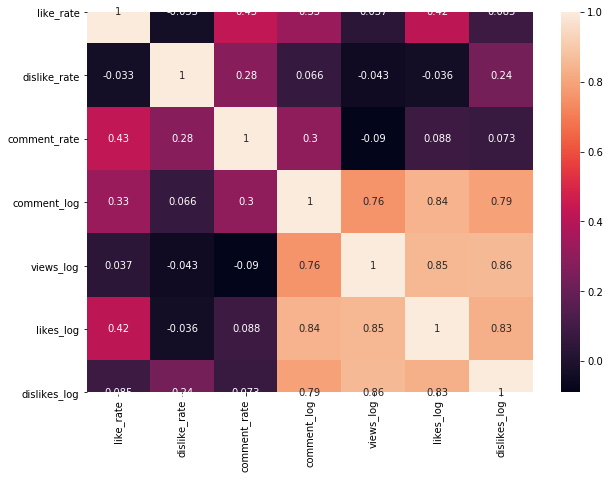

In [18]:
plt.figure(figsize=(10,7))

sns.heatmap(df_yt[['like_rate','dislike_rate','comment_rate','comment_log','views_log','likes_log','dislikes_log','category_name']].corr(),annot=True)
plt.show()

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [21]:
import string
import re
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [22]:
eng_stopwords = set(stopwords.words('english'))

In [23]:
# words count in each comment
df_yt['count_word'] = df_yt['title'].apply(lambda x: len(str(x).split()))
df_yt['count_word_tag'] = df_yt['tags'].apply(lambda x: len(str(x).split()))

#unique word count
df_yt['count_unique_word'] = df_yt['title'].apply(lambda x: len(set(str(x).split())))
df_yt['count_unique_word_tag'] = df_yt['tags'].apply(lambda x: len(set(str(x).split())))

# leter count
df_yt['count_letters'] = df_yt['title'].apply(lambda x: len(str(x)))
df_yt['count_letters_tag'] = df_yt['tags'].apply(lambda x: len(str(x)))


#punctuation count
df_yt['count_punctuations'] = df_yt['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_yt['count_punctuations_tag'] = df_yt['tags'].apply(lambda x:len([c for c in str(x) if c in string.punctuation]))

# uppercase count words
df_yt['count_words_upper'] = df_yt['title'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_yt['count_words_upper_tag'] = df_yt['tags'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#titlecase count words
df_yt['count_words_title'] = df_yt['title'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_yt['count_words_title_tag'] = df_yt['tags'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#number of stop words
df_yt['count_stopwords'] = df_yt['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_yt['count_stopwords_tag'] = df_yt['tags'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#average length of words
df_yt['mean_word_len']= df_yt['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_yt['mean_word_len_tags'] = df_yt['tags'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))



In [24]:
# word count percentage in each comment
df_yt['word_unique_percent'] = df_yt['count_unique_word']*100 / df_yt['count_word']
df_yt['word_unique_percent_tag'] = df_yt['count_unique_word_tag']*100 / df_yt['count_word_tag']

#punctuation percent in each comment
df_yt['punc_percent'] = df_yt['count_punctuations']*100 / df_yt['count_word']
df_yt['punc_percent_tag'] = df_yt['count_punctuations_tag'] *100 / df_yt['count_word_tag']

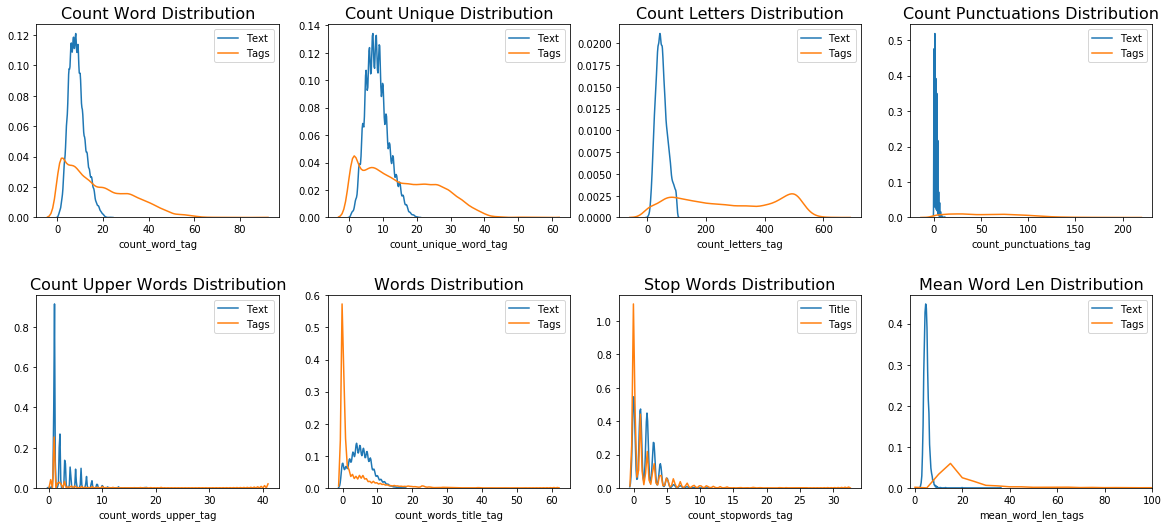

In [25]:
plt.figure(figsize=(20,18))

plt.subplot(441)
g1 = sns.distplot(df_yt['count_word'], hist=False, label='Text')
g1 = sns.distplot(df_yt['count_word_tag'], hist=False,label='Tags')
g1.set_title('Count Word Distribution', fontsize = 16)

plt.subplot(442)
g2 = sns.distplot(df_yt['count_unique_word'], hist=False, label='Text')
g2= sns.distplot(df_yt['count_unique_word_tag'], hist=False, label='Tags')
g2.set_title('Count Unique Distribution', fontsize=16)

plt.subplot(443)
g3 = sns.distplot(df_yt['count_letters'], hist=False, label='Text')
g3= sns.distplot(df_yt['count_letters_tag'], hist=False, label='Tags')
g3.set_title('Count Letters Distribution', fontsize=16)

plt.subplot(444)
g4 = sns.distplot(df_yt['count_punctuations'], hist=False, label='Text')
g4= sns.distplot(df_yt['count_punctuations_tag'], hist=False, label='Tags')
g4.set_title('Count Punctuations Distribution', fontsize=16)

plt.subplot(445)
g5 = sns.distplot(df_yt['count_words_upper'], hist=False, label='Text')
g5= sns.distplot(df_yt['count_words_upper_tag'], hist=False, label='Tags')
g5.set_title('Count Upper Words Distribution', fontsize=16)

plt.subplot(446)
g6 = sns.distplot(df_yt['count_words_title'], hist=False, label='Text')
g6= sns.distplot(df_yt['count_words_title_tag'], hist=False, label='Tags')
g6.set_title('Words Distribution', fontsize=16)

plt.subplot(447)
g7 = sns.distplot(df_yt['count_stopwords'], hist=False, label='Title')
g7= sns.distplot(df_yt['count_stopwords_tag'], hist=False, label='Tags')
g7.set_title('Stop Words Distribution', fontsize=16)

plt.subplot(448)
g8 = sns.distplot(df_yt['mean_word_len'], hist=False, label='Text')
g8= sns.distplot(df_yt['mean_word_len_tags'], hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('Mean Word Len Distribution', fontsize=16)

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)
plt.legend()
plt.show()

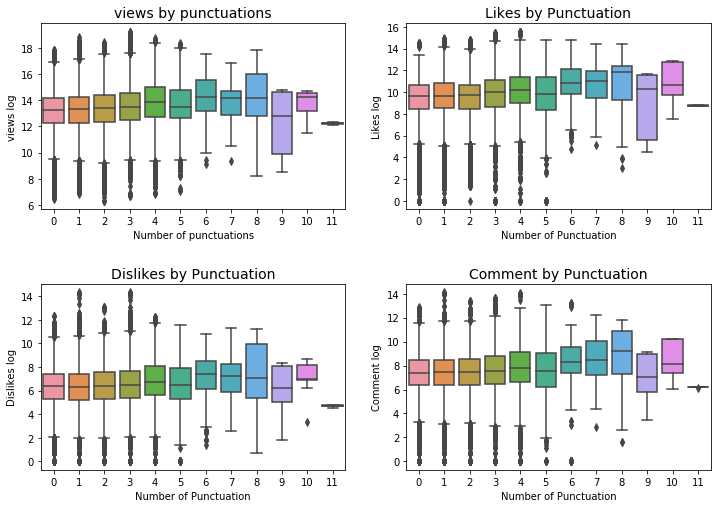

In [26]:
plt.figure(figsize=(12,8))

plt.subplot(221)
g= sns.boxplot(x='count_punctuations',y='views_log', data=df_yt)
g.set_title('views by punctuations', fontsize=14)
g.set_xlabel('Number of punctuations')
g.set_ylabel('views log')

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations',y='likes_log', data=df_yt)
g1.set_title('Likes by Punctuation',fontsize=14)
g1.set_xlabel('Number of Punctuation')
g1.set_ylabel('Likes log')

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations',y='dislikes_log', data=df_yt)
g2.set_title('Dislikes by Punctuation',fontsize=14)
g2.set_xlabel('Number of Punctuation')
g2.set_ylabel('Dislikes log')

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations',y='comment_log', data=df_yt)
g3.set_title('Comment by Punctuation',fontsize=14)
g3.set_xlabel('Number of Punctuation')
g3.set_ylabel('Comment log')

plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)
plt.show()



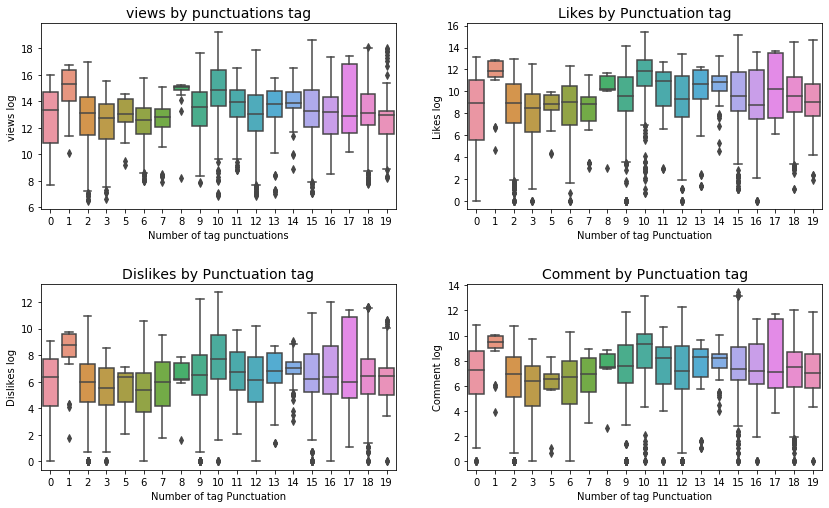

In [27]:
plt.figure(figsize=(14,8))

plt.subplot(221)
g= sns.boxplot(x='count_punctuations_tag',y='views_log', data=df_yt[df_yt['count_punctuations_tag']<20])
g.set_title('views by punctuations tag', fontsize=14)
g.set_xlabel('Number of tag punctuations')
g.set_ylabel('views log')

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tag',y='likes_log', data=df_yt[df_yt['count_punctuations_tag']<20])
g1.set_title('Likes by Punctuation tag',fontsize=14)
g1.set_xlabel('Number of tag Punctuation')
g1.set_ylabel('Likes log')

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tag',y='dislikes_log', data=df_yt[df_yt['count_punctuations_tag']<20])
g2.set_title('Dislikes by Punctuation tag',fontsize=14)
g2.set_xlabel('Number of tag Punctuation')
g2.set_ylabel('Dislikes log')

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tag',y='comment_log', data=df_yt[df_yt['count_punctuations_tag']<20])
g3.set_title('Comment by Punctuation tag',fontsize=14)
g3.set_xlabel('Number of tag Punctuation')
g3.set_ylabel('Comment log')

plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)
plt.show()

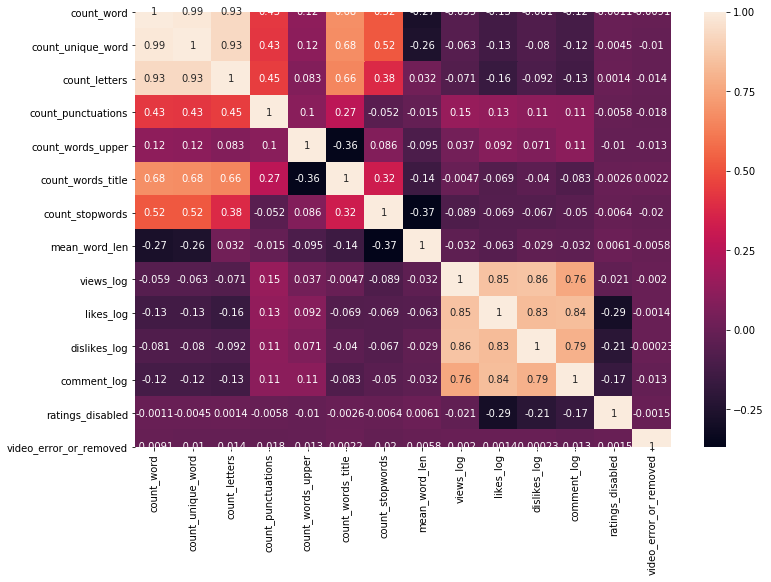

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df_yt[['count_word','count_unique_word','count_letters','count_punctuations','count_words_upper',
                   'count_words_title','count_stopwords','mean_word_len','views_log','likes_log','dislikes_log',
                   'comment_log','ratings_disabled','video_error_or_removed']].corr(), annot=True)
plt.show()

In [30]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.subplot.bottom']= .1

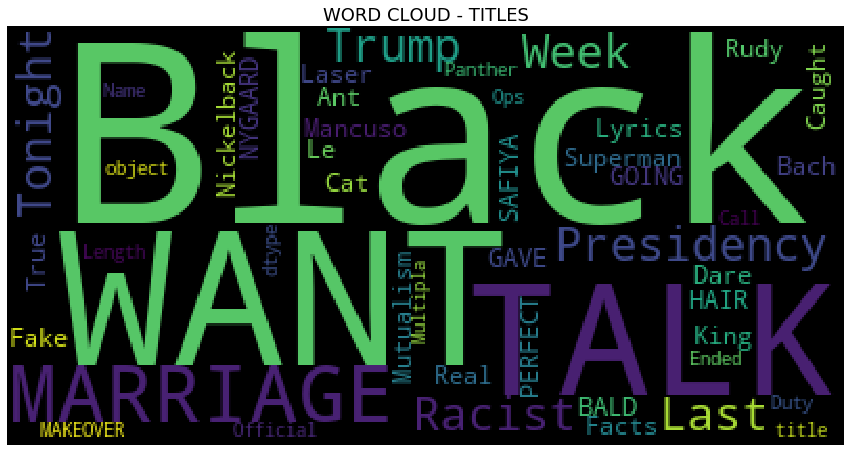

In [31]:
plt.figure(figsize=(15,15))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color= 'black',
                      stopwords = stopwords,
                      max_words = 100,
                      max_font_size = 120,
                      random_state = 42
                     ).generate(str(df_yt['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title('WORD CLOUD - TITLES')
plt.axis('off')
plt.show()

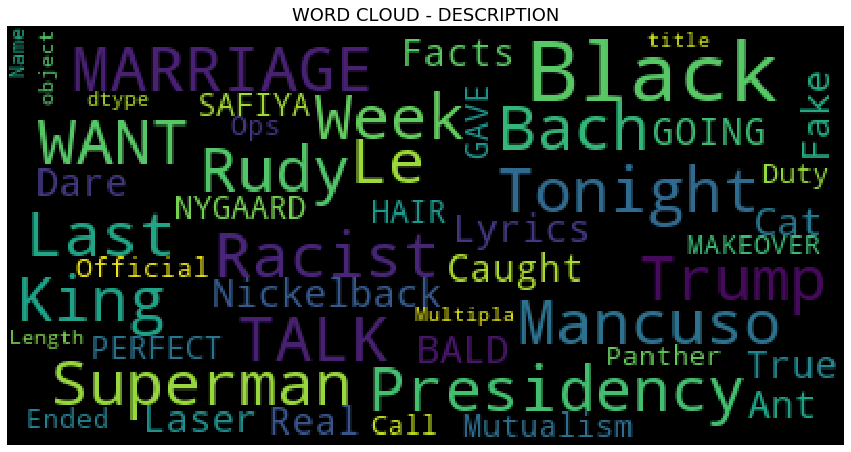

In [32]:
plt.figure(figsize=(15,15))

stopwords= set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                      stopwords = stopwords,
                      max_words = 150,
                      max_font_size = 40,
                      random_state = 42
                     ).generate(str(df_yt['title']))

print(wordcloud)
fig =plt.figure(1)
plt.imshow(wordcloud)
plt.title('WORD CLOUD - DESCRIPTION')
plt.axis('off')
plt.show()

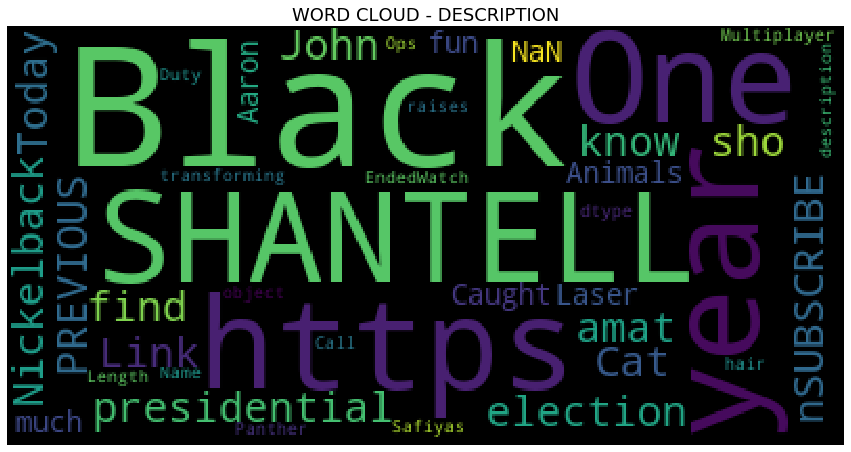

In [33]:
plt.figure(figsize=(15,15))

stopwords = set(STOPWORDS)
newStopWords =['http','youtube','VIDEO','youtu','CHANNEL','WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='black',
                      stopwords = stopwords,
                      max_words = 1200,
                      max_font_size = 80,
                      random_state = 42
                     ).generate(str(df_yt['description']))

print(wordcloud)
fig =plt.figure(1)
plt.imshow(wordcloud)
plt.title('WORD CLOUD - DESCRIPTION')
plt.axis('off')
plt.show()


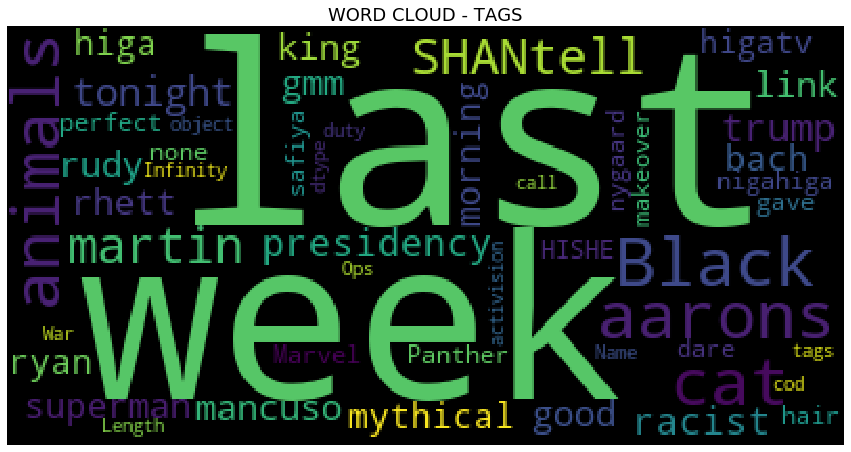

In [34]:
plt.figure(figsize=(15,15))

stopwords= set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                      stopwords = stopwords,
                      max_words = 1200,
                      max_font_size = 120,
                      random_state = 42
                     ).generate(str(df_yt['tags']))

print(wordcloud)
fig =plt.figure(1)
plt.imshow(wordcloud)
plt.title('WORD CLOUD - TAGS')
plt.axis('off')
plt.show()

In [35]:
df_yt['publish_time'] = pd.to_datetime(df_yt['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')  #%Y-%m-%dT%H:%M:%S.%fZ'

category name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


q:\Users\james\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


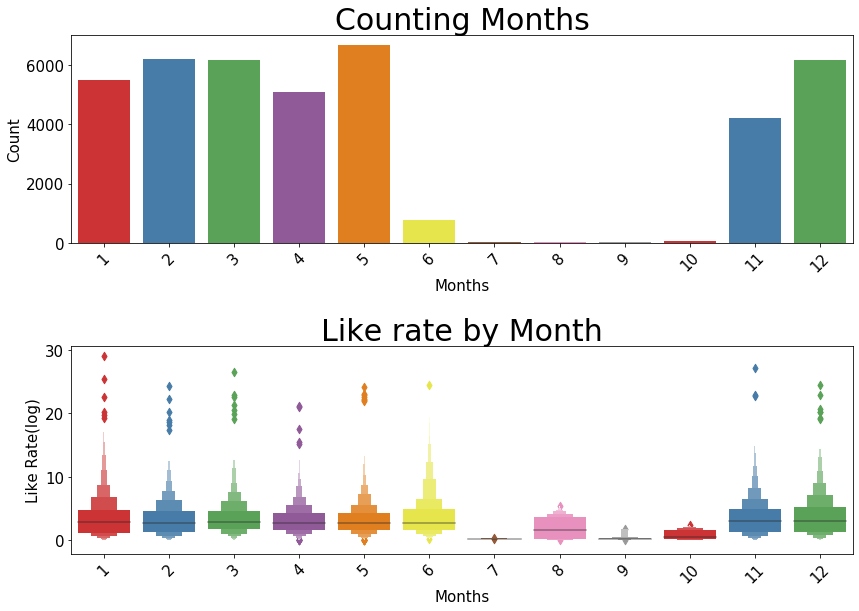

In [36]:
df_yt['month'] = df_yt['publish_time'].dt.month

print('category name count')
print(df_yt['month'].value_counts()[:5])

plt.figure(figsize=(14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_yt, palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Counting Months', fontsize=30)
g.set_xlabel('Months', fontsize=15)
g.set_ylabel('Count', fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month',y='like_rate', data =df_yt,palette='Set1')
g1.set_xticklabels(g.get_xticklabels(), rotation=45)
g1.set_title('Like rate by Month', fontsize=30)
g1.set_xlabel('Months', fontsize=15)
g1.set_ylabel('Like Rate(log)', fontsize=15)

plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show()

In [38]:
df_yt.insert(4, 'publish_date',df_yt['publish_time'].dt.date)
df_yt['publish_time'] = df_yt['publish_time'].dt.time
df_yt['hour','min','sec'] = df_yt['publish_time'].astype(str).str.split(':',expand=True).astype(int)

ValueError: cannot insert publish_date, already exists

In [39]:
df_yt.insert(4, 'publish_date', df_yt['publish_time'].dt.date)
df_yt['publish_time'] = df_yt['publish_time'].dt.time
df_yt[['hour','min','sec']] = df_yt['publish_time'].astype(str).str.split(':', expand=True).astype(int)

ValueError: cannot insert publish_date, already exists